RandomForest Regressor modeli farklı karar alma algoritmalarında veriden subsetler oluşturarak ortak bir karar almayı sağlayan kümelemeli makine öğrenme yöntemidir.
Öncelikle aşağıdaki hücrede gerekli kütüphane ve elemanları import ederek başlayalım.


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
warnings.filterwarnings('ignore')

In [32]:
#TRAİN
df=pd.read_csv('arranged-last.csv')
x=df.drop(columns=['CO2_EMISSIONS_CURRENT','ENVIRONMENT_IMPACT_CURRENT','ENERGY_CONSUMPTION_CURRENT','CO2_EMISS_CURR_PER_FLOOR_AREA','GLAZED_TYPE','SOLAR_WATER_HEATING_FLAG','ENERGY_CONSUMPTION_CURRENT','Unnamed: 0','CURRENT_ENERGY_EFFICIENCY']).values
#CURRENT ENERGY EFFICIENCY ÇIKARILDI.
y=df['CO2_EMISS_CURR_PER_FLOOR_AREA'].values

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = x[:-10],x[-10:],y[:-10],y[-10:] 

from sklearn.preprocessing import MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)


In [33]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

n_estimators = 2000
max_depth = 8
min_samples_split = 5
min_samples_leaf = 2
max_features = 'sqrt'
random_state = 0

# RandomForestRegressor'ü özelleştirilmiş parametrelerle oluşturun
regressor = RandomForestRegressor(n_estimators=n_estimators, 
                                  max_depth=max_depth, 
                                  min_samples_split=min_samples_split, 
                                  min_samples_leaf=min_samples_leaf, 
                                  max_features=max_features, 
                                  random_state=random_state, 
                                  oob_score=True)
regressor.fit(x_train, y_train)


RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=2000, oob_score=True,
                      random_state=0)

In [34]:
# Evaluating the model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score:.2f}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x_test)

# Evaluating the model
predictions = predictions.round(2)

rf_mse = mean_squared_error(y_test, predictions)
rf_mae = mean_absolute_error(y_test, predictions)
rf_r2 = r2_score(y_test, predictions)
print(f'Mean Squared Error: {rf_mse:.2f}\nMean Absolute Error: {rf_mae:.2f}\nR-squared: {rf_r2:.2f}')


Out-of-Bag Score: 0.72
Mean Squared Error: 2.56
Mean Absolute Error: 1.40
R-squared: 0.85


Anlaşılan random forest regressor modelimiz de numpy arraylarına dönürülmesi gereken bir yapı yok. Direk dataframe'den eğitim yapabilriirz.
Ama dataframe'i benzer alt kümelrde eğitmek için kullanabilriiz. Yani model çok geniş olduğu için tümden bir eğitim yerine benzer özellikler vs. gibi sınıflandırarak alt kümelerde eğitmeyi dene.

In [35]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model=SVR(kernel='rbf', C=1.0, gamma='scale', epsilon=0.1)
model.fit(x_train,y_train)
predictions=model.predict(x_test)
# Making predictions on the same data or new data

svr_mse = mean_squared_error(y_test, predictions)
svr_mae = mean_absolute_error(y_test, predictions)
svr_r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {svr_mse:.2f}\nmae: {svr_mae:.2f}\nR-squared: {svr_r2:.2f}')


Mean Squared Error: 21.86
mae: 3.30
R-squared: -0.29


In [36]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=6)

xgb_model.fit(X_train_scaled, y_train, eval_metric="rmse")

y_pred = xgb_model.predict(X_test_scaled)
# Evaluating the model
xgb_mse = mean_squared_error(y_test, y_pred)
xgb_mae = mean_absolute_error(y_test, y_pred)
xgb_r2 = r2_score(y_test, y_pred)

# Sonuçların tek bir print ifadesinde, her metriği yeni bir satırda ve virgülden sonra 2. haneye yuvarlanmış şekilde gösterilmesi
print(f'Mean Squared Error: {xgb_mse:.2f}\nmae: {xgb_mae:.2f}\nR-squared: {xgb_r2:.2f}')



Mean Squared Error: 1.68
mae: 1.13
R-squared: 0.90


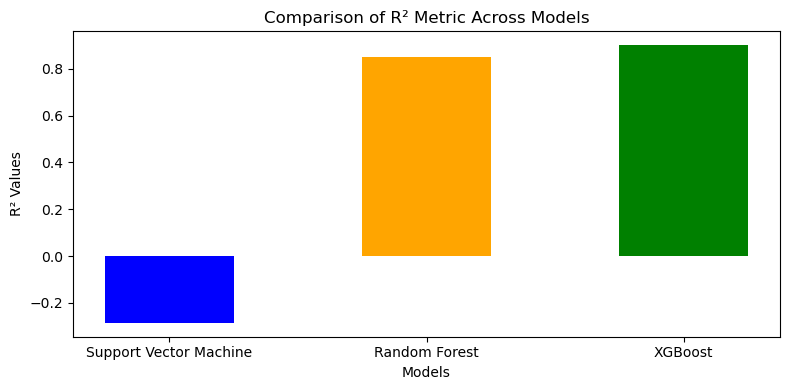

In [37]:
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# R2 Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
r2_values = [svr_r2, rf_r2, xgb_r2]  # Örnek R² değerleri

# Grafik çizimi
fig, ax = plt.subplots(figsize=(8, 4))
bar_width = 0.5  # Sütun genişliği

# Sütunları oluşturma
ax.bar(models, r2_values, bar_width, color=['blue', 'orange', 'green'])

# Eksen etiketleri ve başlık
ax.set_xlabel('Models')
ax.set_ylabel('R² Values')
ax.set_title('Comparison of R² Metric Across Models')

# Grafik ayarları
plt.tight_layout()
plt.show()

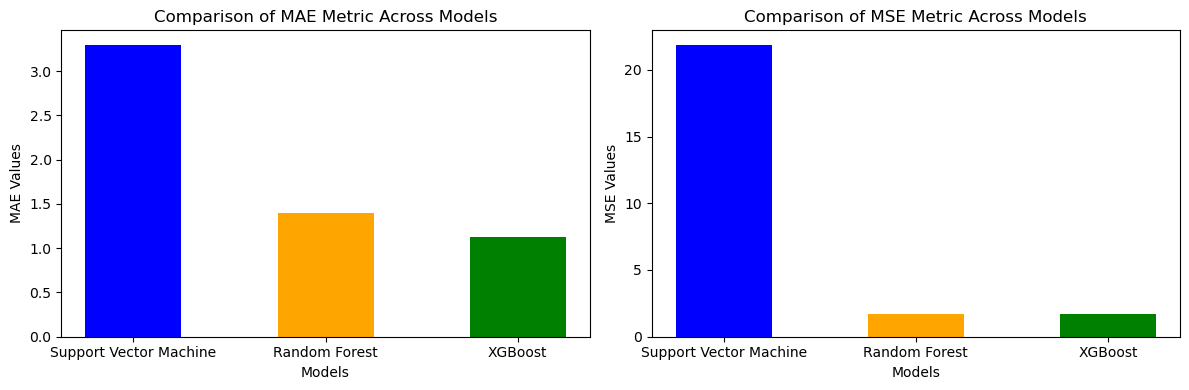

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Model isimleri
models = ['Support Vector Machine', 'Random Forest', 'XGBoost']

# MAE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mae_values = [svr_mae, rf_mae, xgb_mae]  # Örnek MAE değerleri

# MSE Metrik değerleri (örnek değerler, gerçek değerlerle değiştirilmeli)
mse_values = [svr_mse, xgb_mse, xgb_mse]  # Örnek MSE değerleri

# Grafik çizimi için ayarlar
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))  # İki grafik yan yana
bar_width = 0.5  # Sütun genişliği

# MAE için grafik çizimi
axes[0].bar(models, mae_values, bar_width, color=['blue', 'orange', 'green'])
axes[0].set_title('Comparison of MAE Metric Across Models')
axes[0].set_ylabel('MAE Values')
axes[0].set_xlabel('Models')

# MSE için grafik çizimi
axes[1].bar(models, mse_values, bar_width, color=['blue', 'orange', 'green'])
axes[1].set_title('Comparison of MSE Metric Across Models')
axes[1].set_ylabel('MSE Values')
axes[1].set_xlabel('Models')

# Grafik ayarları
plt.tight_layout()
plt.show()